In [1]:
%matplotlib inline
import os
import numpy as np
import datetime as dt
from scipy import interpolate
from osgeo import gdal
from matplotlib import pyplot as plt, patches
from mintpy.utils import readfile, utils as ut, plot as pp
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/coreg')
os.chdir(work_dir)
print('Go to directory:', work_dir)

data_dir = os.path.expanduser('~/data/geolocation/HawaiiAlosDT598/')
ifg1_dir = os.path.join(data_dir, 'interferogram_v1')
ifg2_dir = os.path.join(data_dir, 'interferogram_v2')
mask_file = os.path.join(data_dir, 'geometry', 'waterMask.rdr')
xstep, ystep = 2, 2  # 2, 9

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/coreg


### Read data

In [3]:
def read_cpx_coherence(cor_file, xstep=1, ystep=1):
    band1 = readfile.read(cor_file, datasetName='band1', xstep=xstep, ystep=ystep)[0]
    band2 = readfile.read(cor_file, datasetName='band2', xstep=xstep, ystep=ystep)[0]
    cor = np.abs(np.vectorize(complex)(band1, band2)).astype(np.float32)
    return cor

pha1 = readfile.read(os.path.join(ifg1_dir, 'topophase.flat'), datasetName='phase', xstep=xstep, ystep=ystep)[0]
pha2 = readfile.read(os.path.join(ifg2_dir, 'topophase.flat'), datasetName='phase', xstep=xstep, ystep=ystep)[0]
cor1 = read_cpx_coherence(os.path.join(ifg1_dir, 'topophase.cor'), xstep=xstep, ystep=ystep)
cor2 = read_cpx_coherence(os.path.join(ifg2_dir, 'topophase.cor'), xstep=xstep, ystep=ystep)
mask = readfile.read(os.path.join(data_dir, 'geometry', 'waterMask.rdr'), xstep=xstep, ystep=ystep)[0]

### Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/coreg/coreg_demo.png


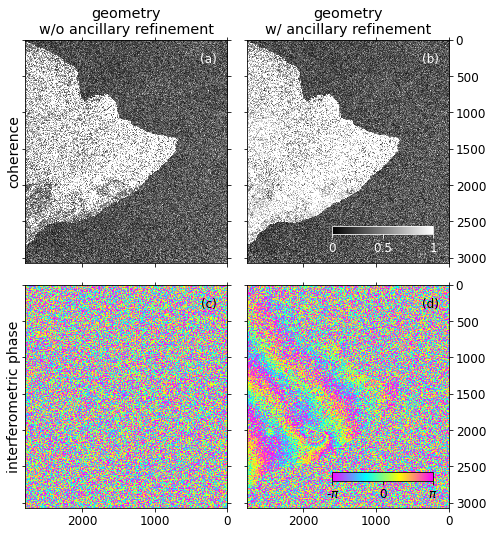

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[7, 7.6], sharex=True, sharey=True)
extent = (-0.5, mask.shape[1]-0.5, int(mask.shape[0]/4.5)-0.5, -0.5)
kwargs1 = dict(vmin=0,      vmax=1,     cmap=pp.ColormapExt('gray').colormap, interpolation='nearest', extent=extent)
kwargs2 = dict(vmin=-np.pi, vmax=np.pi, cmap=pp.ColormapExt('cmy').colormap,  interpolation='nearest', extent=extent)
im1 = axs[0,0].imshow(cor1, **kwargs1);  im1 = axs[0,1].imshow(cor2, **kwargs1)
im2 = axs[1,0].imshow(pha1, **kwargs2);  im2 = axs[1,1].imshow(pha2, **kwargs2)

# axis format
for ax in axs.flatten():
    ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
axs[0,0].invert_xaxis()
for ax in axs[:,0]:       ax.tick_params(labelleft=False)
for ax in axs[:,1]:       ax.tick_params(labelright=True)
axs[0,0].set_title('geometry\nw/o ancillary refinement')
axs[0,1].set_title('geometry\nw/ ancillary refinement')
axs[0,0].set_ylabel('coherence', fontsize=14)
axs[1,0].set_ylabel('interferometric phase', fontsize=14)
fig.tight_layout()

# colorbars
caxs = [fig.add_axes([0.67, 0.56, 0.2, 0.015]),
        fig.add_axes([0.67, 0.11, 0.2, 0.015])]
cs = ['w', 'k']
for i, (cax, im, ticks, ticklabels) in enumerate(zip(caxs, [im1, im2], [[0,0.5,1], [-np.pi, 0, np.pi]], [['0', '0.5', '1'], [r'-$\pi$', '0', r'$\pi$']])):
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=ticks)
    cbar.ax.set_xticklabels(ticklabels, color=cs[i])
    cbar.outline.set_edgecolor(cs[i])
    cax.tick_params(axis='both', colors=cs[i])

# labels
for i, (label, c) in enumerate(zip(['(a)', '(b)', '(c)', '(d)'], ['w', 'w', 'k', 'k'])):
    axs.flatten()[i].annotate(label, color=c, xy=(0.95, 0.90), xycoords='axes fraction', ha='right')

# output
out_fig = os.path.join(work_dir, 'coreg_demo.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [5]:
cmean1 = np.nanmean(np.multiply(cor1, mask))
cmean2 = np.nanmean(np.multiply(cor2, mask))
print('mean coherence on land: {:.2f} vs. {:.2f}'.format(cmean1, cmean2))

mean coherence on land: 0.34 vs. 0.39
